## Goal
Train a logistic regression model to predict if a person can complete a 50m marathon race.

## Import libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

## mock data

In [78]:
d = {'miles_per_week': [37,39,46,51,88,17,18,20,21,22,23,24,25,27,28,29,30,31,32,33,34,38,40,42,57,68,35,36,41,43,45,47,49,50,52,53,54,55,56,58,59,60,61,63,64,65,66,69,70,72,73,75,76,77,78,80,81,82,83,84,85,86,87,89,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,113,114,115,116,116,118,119,120,121,123,124,126,62,67,74,79,90,112], 'completed_50m_ultra': ['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes','no','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes',]}


In [79]:
df = pd.DataFrame(data=d)

In [80]:
df.head()

,miles_per_week,completed_50m_ultra
0,37,no
1,39,no
2,46,no
3,51,no
4,88,no


Data shows us the amount per week, which signifies the number of miles individuals ran during training in a week, and completed 50m ultra, which signifies if an individual completed the marathon race 

## encoding our data using ordinal encoding

In [81]:
from sklearn.preprocessing import OrdinalEncoder

finished_race = [['no', 'yes']]
enc = OrdinalEncoder(categories=finished_race)
df['completed_50m_ultra'] = enc.fit_transform(df[['completed_50m_ultra']])
df

,miles_per_week,completed_50m_ultra
0,37,0.0
1,39,0.0
2,46,0.0
3,51,0.0
4,88,0.0
...,...,...
96,67,1.0
97,74,1.0
98,79,1.0
99,90,1.0


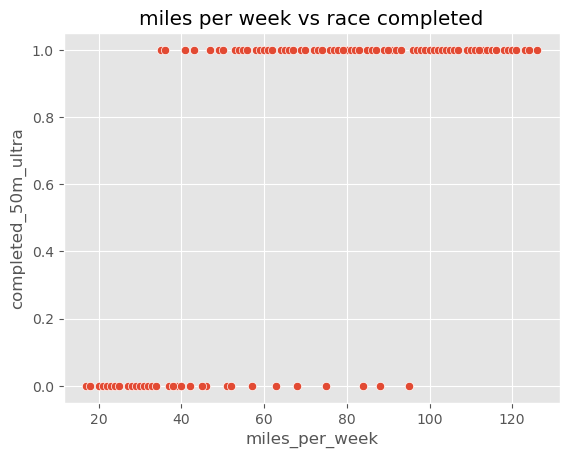

In [82]:
ax = sns.scatterplot(x = 'miles_per_week', y ='completed_50m_ultra', data = df)
ax.set_title('miles per week vs race completed')
plt.show()

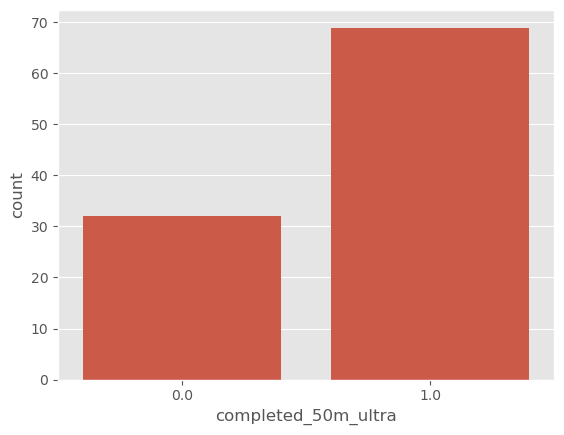

In [83]:
sns.countplot(x='completed_50m_ultra', data=df)
plt.show()

## spliting our data

In [99]:
from sklearn.model_selection import train_test_split

X = df[['miles_per_week']]
y = df[['completed_50m_ultra']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=11)

## training our model

In [100]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

## prediction

In [101]:
y_pred = lr_model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)

## model evaluation

In [114]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy:{accuracy:.2f}")

accuracy:0.90


In [116]:
print(confusion_matrix(y_test, y_pred))

[[ 5  1]
 [ 1 14]]


In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.93      0.93      0.93        15

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21

